In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
arquivo = "../data/raw/BASE DE DADOS PEDE 2024 - DATATHON.xlsx"

df_2022 = pd.read_excel(arquivo, sheet_name="PEDE2022")

columns = [
    "RA", # vira index
    "Fase",
    "Ano nasc",
    "Gênero",
    "Instituição de ensino",
    "Pedra 22",
    "INDE 22",
    "Cg",
    "Cf",
    "Ct",
    "Nº Av",
    "IAA",
    "IEG",
    "IPS",
    "Rec Psicologia",
    "IDA",
    'Matem', 
    'Portug', 
    'Inglês',
    "Indicado",
    "Atingiu PV",
    "IPV",
    "IAN",
    'Destaque IEG', 
    'Destaque IDA', 
    'Destaque IPV',
    'Defas', 
]
df_2022["ano_base"] = 2022
df_2022 = df_2022[columns].rename(columns={"INDE 22": "INDE", "Pedra 22": "Pedra"})
df_2022.head()

,RA,Fase,Ano nasc,Gênero,Instituição de ensino,Pedra,INDE,Cg,Cf,Ct,...,Portug,Inglês,Indicado,Atingiu PV,IPV,IAN,Destaque IEG,Destaque IDA,Destaque IPV,Defas
0,RA-1,7,2003,Menina,Escola Pública,Quartzo,5.783,753,18,10,...,3.5,6.0,Sim,Não,7.278,5.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,-1
1,RA-2,7,2005,Menina,Rede Decisão,Ametista,7.055,469,8,3,...,4.5,9.7,Não,Não,6.778,10.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0
2,RA-3,7,2005,Menina,Rede Decisão,Ágata,6.591,629,13,6,...,4.0,6.9,Não,Não,7.556,10.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,0
3,RA-4,7,2005,Menino,Rede Decisão,Quartzo,5.951,731,15,7,...,3.5,8.7,Não,Não,5.278,10.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0
4,RA-5,7,2005,Menina,Rede Decisão,Ametista,7.427,344,6,2,...,2.9,5.7,Não,Não,7.389,10.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0


In [3]:
df_2023 = pd.read_excel(arquivo, sheet_name="PEDE2023")

columns = [
    "RA", # vira index
    "Fase",
    "Data de Nasc",
    "Gênero",
    "Instituição de ensino",
    "Pedra 23",
    "INDE 2023",
    "Cg",
    "Cf",
    "Ct",
    "Nº Av",
    "IAA",
    "IEG",
    "IPS",
    "Rec Psicologia",
    "IDA",
    'Mat', 
    'Por', 
    'Ing',
    "Indicado",
    "Atingiu PV",
    "IPV",
    "IAN",
    'Destaque IEG', 
    'Destaque IDA', 
    'Destaque IPV',
    'Defasagem', 
]
df_2023 = df_2023[columns] 
df_2023["Ano nasc"] = pd.to_datetime(df_2023["Data de Nasc"]).dt.year
df_2023["ano_base"] = 2023


df_2023 = df_2023.rename(columns={
    "INDE 2023": "INDE",
    "Mat": "Matem",
    "Por": "Portug",
    "Ing": "Inglês",
    "Defasagem": "Defas",
    "Pedra 23": "Pedra",
}).drop(columns=["Data de Nasc"])


df_2023.head()

,RA,Fase,Gênero,Instituição de ensino,Pedra,INDE,Cg,Cf,Ct,Nº Av,...,Indicado,Atingiu PV,IPV,IAN,Destaque IEG,Destaque IDA,Destaque IPV,Defas,Ano nasc,ano_base
0,RA-861,ALFA,Feminino,Pública,NaN,9.31095,NaN,NaN,NaN,2.0,...,NaN,NaN,8.920,10.0,NaN,NaN,NaN,0,2015,2023
1,RA-862,ALFA,Masculino,Pública,NaN,8.22120,NaN,NaN,NaN,2.0,...,NaN,NaN,8.585,5.0,NaN,NaN,NaN,-1,2014,2023
2,RA-863,ALFA,Masculino,Pública,NaN,5.92975,NaN,NaN,NaN,2.0,...,NaN,NaN,6.260,10.0,NaN,NaN,NaN,0,2016,2023
3,RA-864,ALFA,Feminino,Pública,NaN,7.03400,NaN,NaN,NaN,2.0,...,NaN,NaN,8.500,10.0,NaN,NaN,NaN,0,2015,2023
4,RA-865,ALFA,Masculino,Pública,NaN,8.15520,NaN,NaN,NaN,2.0,...,NaN,NaN,7.915,10.0,NaN,NaN,NaN,0,2014,2023


In [4]:
df_2024 = pd.read_excel(arquivo, sheet_name="PEDE2024")

columns = [
    "RA", # vira index
    "Fase",
    "Data de Nasc",
    "Gênero",
    "Instituição de ensino",
    "Pedra 2024",
    "INDE 2024",
    "Cg",
    "Cf",
    "Ct",
    "Nº Av",
    "IAA",
    "IEG",
    "IPS",
    "Rec Psicologia",
    "IDA",
    'Mat', 
    'Por', 
    'Ing',
    "Indicado",
    "Atingiu PV",
    "IPV",
    "IAN",
    'Destaque IEG', 
    'Destaque IDA', 
    'Destaque IPV',
    'Defasagem', 
]

df_2024 = df_2024[columns]
df_2024["Ano nasc"] = pd.to_datetime(df_2024["Data de Nasc"]).dt.year
df_2024["ano_base"] = 2024

df_2024 = df_2024.rename(columns={
    "INDE 2024": "INDE",
    "Mat": "Matem",
    "Por": "Portug",
    "Ing": "Inglês",
    "Defasagem": "Defas",
    "Pedra 2024": "Pedra",
}).drop(columns=["Data de Nasc"])

df_2024.head()

,RA,Fase,Gênero,Instituição de ensino,Pedra,INDE,Cg,Cf,Ct,Nº Av,...,Indicado,Atingiu PV,IPV,IAN,Destaque IEG,Destaque IDA,Destaque IPV,Defas,Ano nasc,ano_base
0,RA-1275,ALFA,Masculino,Pública,Ametista,7.611367,NaN,NaN,NaN,3,...,NaN,NaN,5.446667,10.0,NaN,NaN,NaN,0,2016,2024
1,RA-1276,ALFA,Feminino,Pública,Topázio,8.002867,NaN,NaN,NaN,3,...,NaN,NaN,7.050000,10.0,NaN,NaN,NaN,0,2016,2024
2,RA-1277,ALFA,Masculino,Pública,Ametista,7.9522,NaN,NaN,NaN,3,...,NaN,NaN,7.046667,10.0,NaN,NaN,NaN,0,2016,2024
3,RA-868,ALFA,Masculino,Pública,Ametista,7.156367,NaN,NaN,NaN,3,...,NaN,NaN,7.213333,5.0,NaN,NaN,NaN,-1,2015,2024
4,RA-1278,ALFA,Masculino,Pública,Quartzo,5.4442,NaN,NaN,NaN,3,...,NaN,NaN,4.173333,5.0,NaN,NaN,NaN,-1,2015,2024


In [5]:
df_tratado = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
df_tratado.head()

,RA,Fase,Ano nasc,Gênero,Instituição de ensino,Pedra,INDE,Cg,Cf,Ct,...,Inglês,Indicado,Atingiu PV,IPV,IAN,Destaque IEG,Destaque IDA,Destaque IPV,Defas,ano_base
0,RA-1,7,2003,Menina,Escola Pública,Quartzo,5.783,753.0,18.0,10.0,...,6.0,Sim,Não,7.278,5.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,-1,NaN
1,RA-2,7,2005,Menina,Rede Decisão,Ametista,7.055,469.0,8.0,3.0,...,9.7,Não,Não,6.778,10.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0,NaN
2,RA-3,7,2005,Menina,Rede Decisão,Ágata,6.591,629.0,13.0,6.0,...,6.9,Não,Não,7.556,10.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,0,NaN
3,RA-4,7,2005,Menino,Rede Decisão,Quartzo,5.951,731.0,15.0,7.0,...,8.7,Não,Não,5.278,10.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0,NaN
4,RA-5,7,2005,Menina,Rede Decisão,Ametista,7.427,344.0,6.0,2.0,...,5.7,Não,Não,7.389,10.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,0,NaN


In [13]:
df_tratado.describe()

,Ano nasc,Cg,Cf,Ct,Nº Av,IAA,IEG,IPS,IDA,Matem,Portug,Inglês,IPV,IAN,Defas,ano_base
count,3030.000000,860.000000,860.000000,860.000000,2954.000000,2865.000000,2954.000000,2859.000000,2852.000000,2846.000000,2845.000000,1091.000000,2852.000000,3030.000000,3030.000000,2170.000000
mean,2010.454455,430.516279,75.519767,6.598837,3.031821,7.918225,7.945696,6.287129,6.375964,6.161595,6.430668,6.289413,7.545476,7.179043,-0.642904,2023.532719
std,3.314445,248.432761,52.312670,3.975858,1.063670,2.626209,2.152281,1.792491,1.956637,2.398341,2.138916,2.732636,1.084347,2.535266,0.866382,0.499043
min,1996.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000,-5.000000,2023.000000
25%,2008.000000,215.750000,30.000000,3.000000,2.000000,7.900000,7.300000,5.020000,5.100000,4.800000,5.200000,4.500000,6.984000,5.000000,-1.000000,2023.000000
50%,2011.000000,430.500000,67.000000,6.000000,3.000000,8.751000,8.600000,7.500000,6.666667,6.300000,6.700000,6.700000,7.583000,5.000000,-1.000000,2024.000000
75%,2013.000000,645.250000,118.000000,9.000000,4.000000,9.500000,9.400000,7.510000,7.833333,8.000000,8.000000,8.500000,8.255000,10.000000,0.000000,2024.000000
max,2017.000000,862.000000,192.000000,18.000000,6.000000,10.002000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.010000,10.000000,3.000000,2024.000000


In [12]:
remove_columns = ["RA", "Fase", "INDE"]

columns = [
    col for col in df_tratado.select_dtypes(include="object").columns
    if col not in remove_columns
]
for col in columns:
    print(f"{col}: {df_tratado[col].unique()}")

Gênero: ['Menina' 'Menino' 'Feminino' 'Masculino']
Instituição de ensino: ['Escola Pública' 'Rede Decisão' 'Escola JP II' 'Pública' 'Privada'
 'Privada - Programa de Apadrinhamento'
 'Privada - Programa de apadrinhamento' 'Concluiu o 3º EM'
 'Nenhuma das opções acima' 'Privada *Parcerias com Bolsa 100%'
 'Privada - Pagamento por *Empresa Parceira' nan
 'Bolsista Universitário *Formado (a)']
Pedra: ['Quartzo' 'Ametista' 'Ágata' 'Topázio' nan 'Agata' 'INCLUIR']
Rec Psicologia: ['Requer avaliação' 'Sem limitações' 'Não atendido' 'Não indicado'
 'Não avaliado' nan]
Indicado: ['Sim' 'Não' nan]
Atingiu PV: ['Não' 'Sim' nan]
Destaque IEG: ['Melhorar: Melhorar a sua entrega de lições de casa.'
 'Destaque: A sua boa entrega das lições de casa.' nan]
Destaque IDA: ['Melhorar: Empenhar-se mais nas aulas e avaliações.'
 'Destaque: As suas boas notas na Passos Mágicos.' nan]
Destaque IPV: ['Melhorar: Integrar-se mais aos Princípios Passos Mágicos.'
 'Destaque: A sua boa integração aos Princípios Pa

# EDA

Responder objetivamente:
1. Como está distribuída a defasagem?
2. Existe separação clara entre alunos em risco e não risco?
3. Quais variáveis realmente explicam Defas?
4. Onde há redundância?
5. Onde faltam variáveis (necessidade de novas features)?

In [14]:
# Visão geral do dataset
df_tratado.shape


(3030, 28)

In [17]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     3030 non-null   object 
 1   Fase                   3030 non-null   object 
 2   Ano nasc               3030 non-null   int64  
 3   Gênero                 3030 non-null   object 
 4   Instituição de ensino  3029 non-null   object 
 5   Pedra                  1952 non-null   object 
 6   INDE                   2883 non-null   object 
 7   Cg                     860 non-null    float64
 8   Cf                     860 non-null    float64
 9   Ct                     860 non-null    float64
 10  Nº Av                  2954 non-null   float64
 11  IAA                    2865 non-null   float64
 12  IEG                    2954 non-null   float64
 13  IPS                    2859 non-null   float64
 14  Rec Psicologia         860 non-null    object 
 15  IDA 

In [19]:
df_tratado.describe().T

,count,mean,std,min,25%,50%,75%,max
Ano nasc,3030.0,2010.454455,3.314445,1996.0,2008.000,2011.000000,2013.000000,2017.000
Cg,860.0,430.516279,248.432761,1.0,215.750,430.500000,645.250000,862.000
Cf,860.0,75.519767,52.312670,1.0,30.000,67.000000,118.000000,192.000
Ct,860.0,6.598837,3.975858,1.0,3.000,6.000000,9.000000,18.000
Nº Av,2954.0,3.031821,1.063670,0.0,2.000,3.000000,4.000000,6.000
IAA,2865.0,7.918225,2.626209,0.0,7.900,8.751000,9.500000,10.002
IEG,2954.0,7.945696,2.152281,0.0,7.300,8.600000,9.400000,10.000
IPS,2859.0,6.287129,1.792491,2.5,5.020,7.500000,7.510000,10.000
IDA,2852.0,6.375964,1.956637,0.0,5.100,6.666667,7.833333,10.000
Matem,2846.0,6.161595,2.398341,0.0,4.800,6.300000,8.000000,10.000


In [20]:
df_tratado["target_defas"] = ((df_tratado["Defas"] >= -2) & (df_tratado["Defas"] <= 1)).astype(int)
df_tratado["target_defas"].value_counts(normalize=True) * 100


target_defas
1    97.656766
0     2.343234
Name: proportion, dtype: float64

Ensino efetiva - Fase de Ensino ideal Defasagem IAN

maior 0 Em fase 
-2 e 0 Moderada
-3 Severa

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


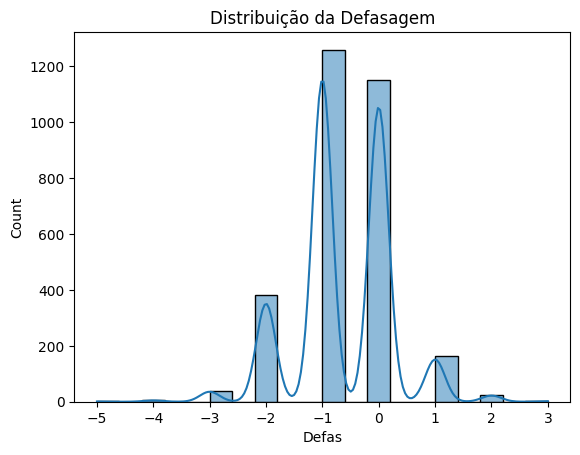

In [21]:
plt.figure()
sns.histplot(df_tratado["Defas"], bins=20, kde=True)
plt.title("Distribuição da Defasagem")
plt.show()

In [22]:
missing = (
    df_tratado.isnull()
        .mean()
        .sort_values(ascending=False)
        .to_frame("percent_missing")
)

missing["percent_missing"] *= 100
missing



,percent_missing
Rec Psicologia,71.617162
Cf,71.617162
Atingiu PV,71.617162
Indicado,71.617162
Destaque IPV,71.617162
Destaque IEG,71.617162
Ct,71.617162
Destaque IDA,71.617162
Cg,71.617162
Inglês,63.993399


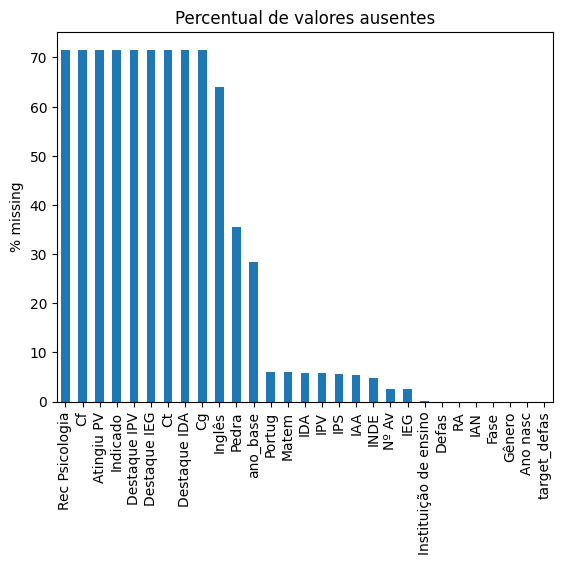

In [23]:
plt.figure()
missing["percent_missing"].plot(kind="bar")
plt.title("Percentual de valores ausentes")
plt.ylabel("% missing")
plt.show()


In [24]:
num_cols = df_tratado.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_tratado.select_dtypes(include=["object"]).columns

num_cols, cat_cols


(Index(['Ano nasc', 'Cg', 'Cf', 'Ct', 'Nº Av', 'IAA', 'IEG', 'IPS', 'IDA',
        'Matem', 'Portug', 'Inglês', 'IPV', 'IAN', 'Defas', 'ano_base',
        'target_defas'],
       dtype='object'),
 Index(['RA', 'Fase', 'Gênero', 'Instituição de ensino', 'Pedra', 'INDE',
        'Rec Psicologia', 'Indicado', 'Atingiu PV', 'Destaque IEG',
        'Destaque IDA', 'Destaque IPV'],
       dtype='object'))

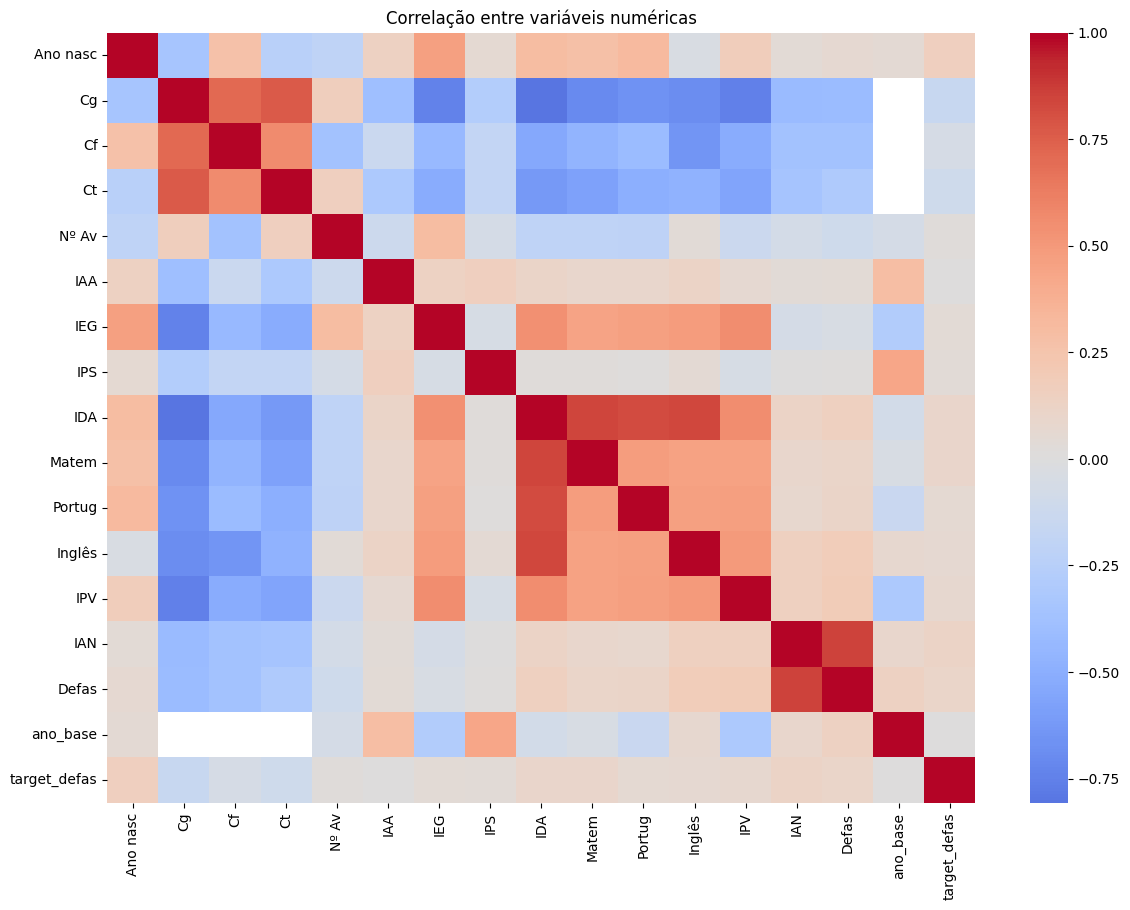

In [25]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    df_tratado[num_cols].corr(),
    cmap="coolwarm",
    center=0
)
plt.title("Correlação entre variáveis numéricas")
plt.show()


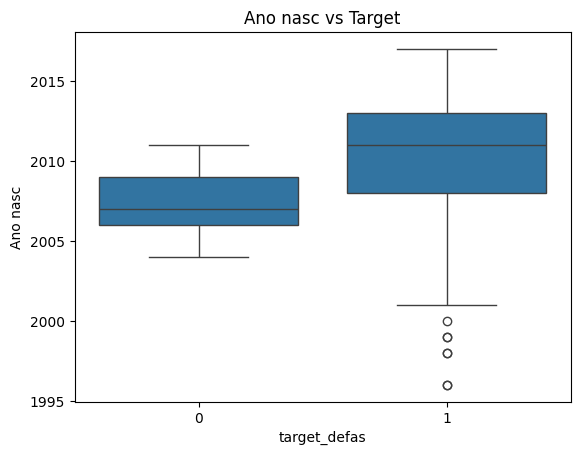

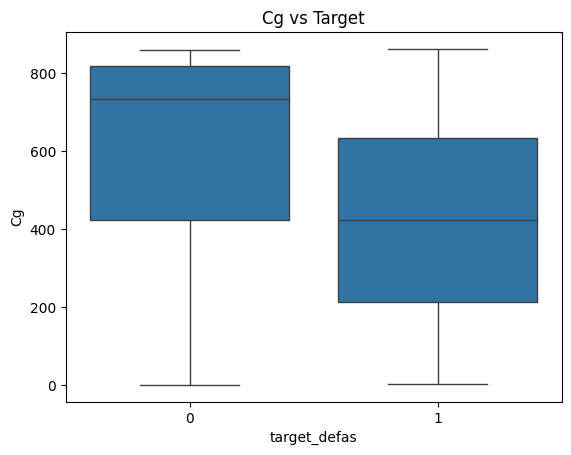

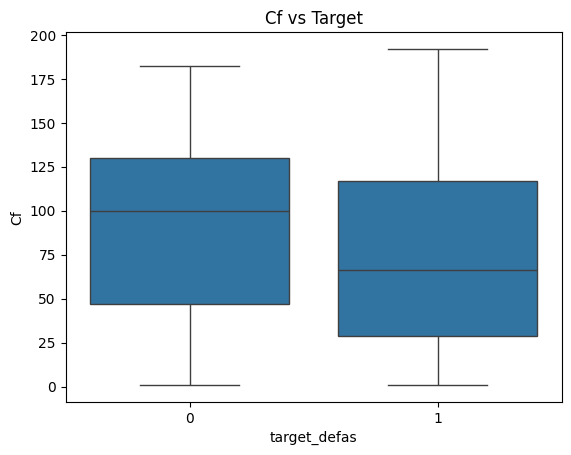

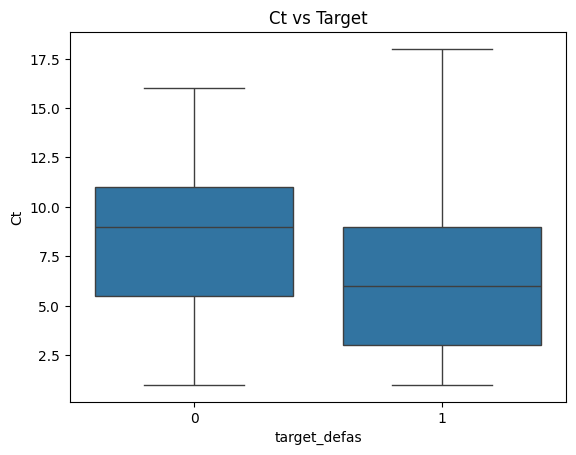

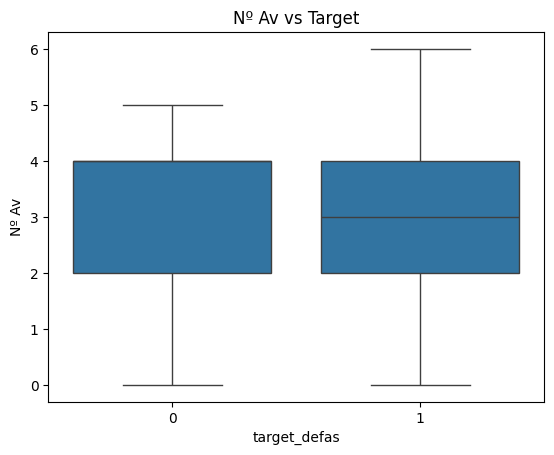

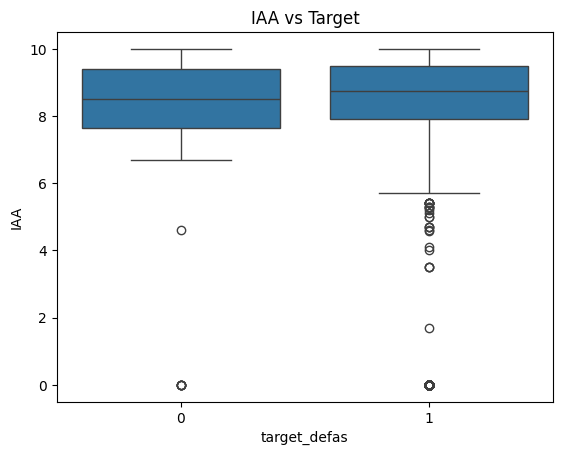

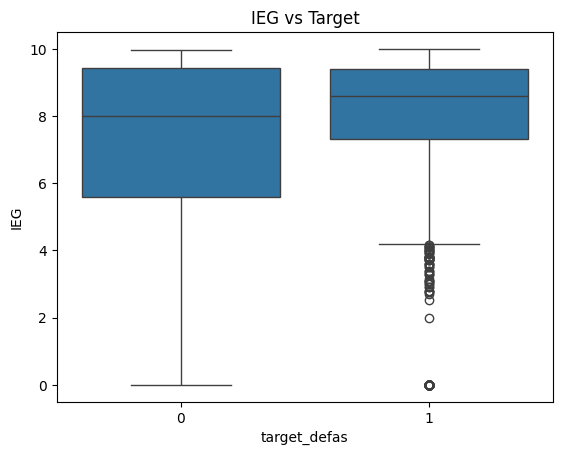

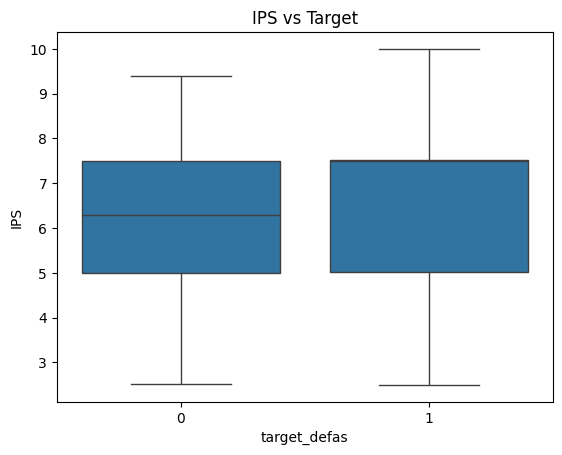

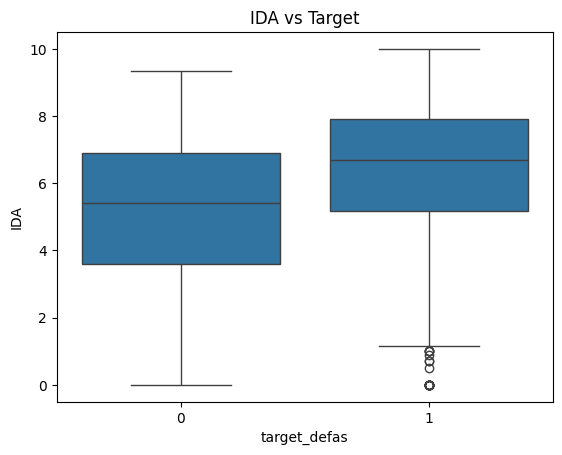

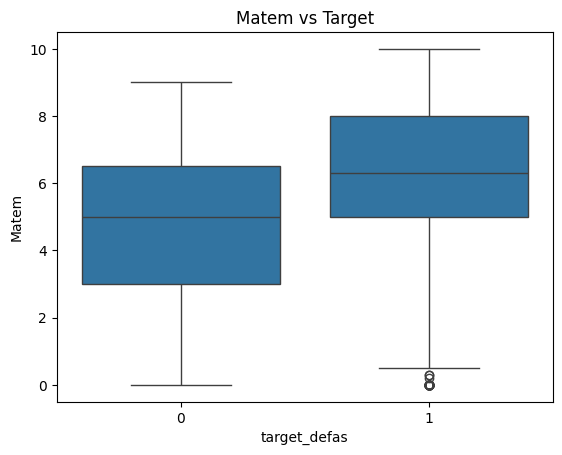

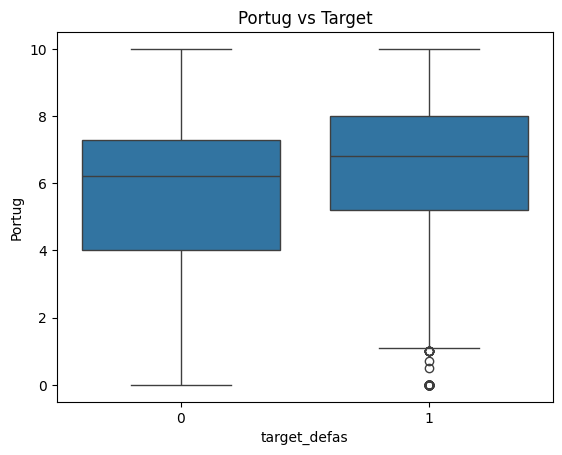

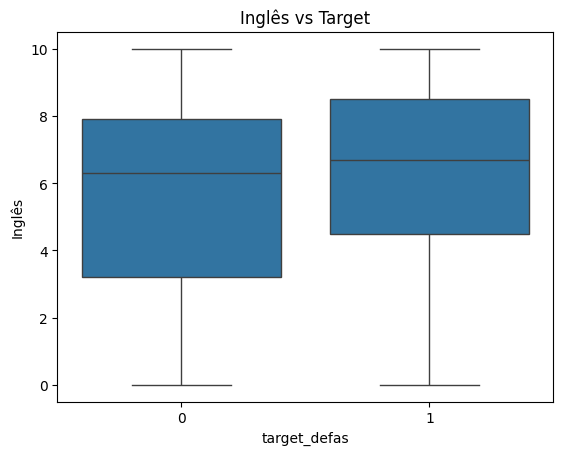

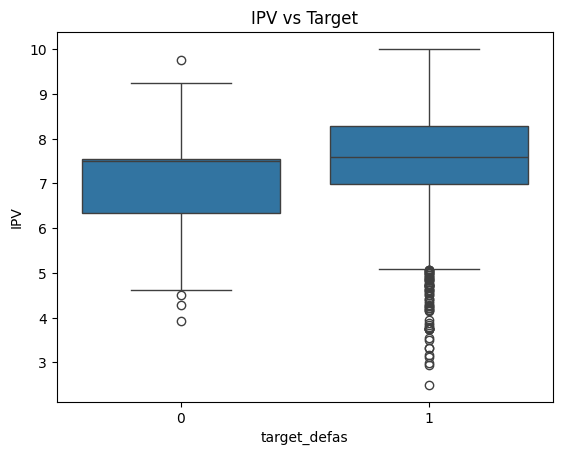

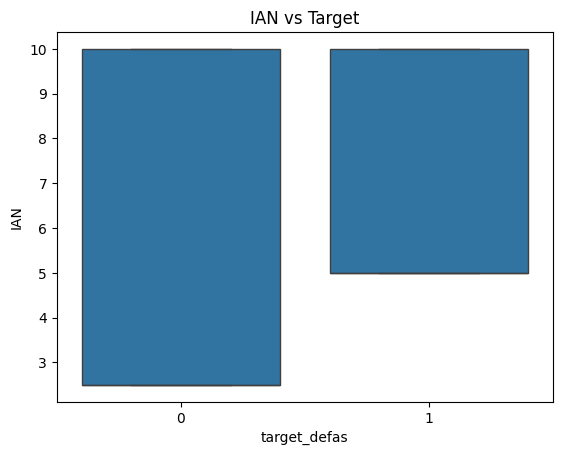

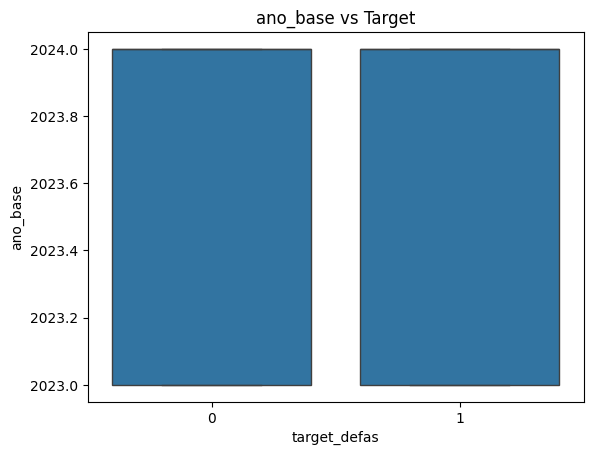

In [26]:
for col in num_cols:
    if col not in ["Defas", "target_defas"]:
        plt.figure()
        sns.boxplot(
            x="target_defas",
            y=col,
            data=df_tratado
        )
        plt.title(f"{col} vs Target")
        plt.show()


In [27]:
stats_result = []

for col in num_cols:
    if col not in ["Defas", "target_defas"]:

        grupo_0 = df_tratado[df_tratado["target_defas"] == 0][col].dropna()
        grupo_1 = df_tratado[df_tratado["target_defas"] == 1][col].dropna()

        if len(grupo_0) > 30 and len(grupo_1) > 30:
            stat, p = stats.mannwhitneyu(grupo_0, grupo_1)
            stats_result.append([col, p])

stats_df = pd.DataFrame(stats_result, columns=["feature", "p_value"])
stats_df.sort_values("p_value")


,feature,p_value
0,Ano nasc,1.007831e-19
13,IAN,8.569174e-13
9,Matem,8.601532e-06
1,Cg,1.074374e-05
8,IDA,1.842743e-05
12,IPV,1.624912e-04
7,IPS,1.285087e-03
3,Ct,3.258557e-03
10,Portug,4.373424e-03
6,IEG,7.176550e-02


In [28]:
for col in cat_cols:
    display(
        df_tratado[col]
        .value_counts(dropna=False)
        .head(15)
    )

RA
RA-1      3
RA-321    3
RA-514    3
RA-516    3
RA-517    3
RA-518    3
RA-521    3
RA-522    3
RA-524    3
RA-526    3
RA-527    3
RA-528    3
RA-529    3
RA-530    3
RA-531    3
Name: count, dtype: int64

Fase
ALFA      427
FASE 2    200
1         192
0         190
FASE 1    173
2         155
3         148
FASE 3    132
FASE 4     94
4          76
FASE 5     65
FASE 8     63
5          60
9          38
FASE 6     33
Name: count, dtype: int64

Gênero
Feminino     1169
Masculino    1001
Menina        457
Menino        403
Name: count, dtype: int64

Instituição de ensino
Pública                                      1722
Escola Pública                                752
Privada - Programa de Apadrinhamento          194
Rede Decisão                                  106
Privada                                       104
Privada *Parcerias com Bolsa 100%             101
Privada - Pagamento por *Empresa Parceira      17
Concluiu o 3º EM                               14
Bolsista Universitário *Formado (a)            13
Escola JP II                                    2
Privada - Programa de apadrinhamento            2
Nenhuma das opções acima                        2
NaN                                             1
Name: count, dtype: int64

Pedra
NaN         1078
Ametista     739
Topázio      456
Ágata        250
Quartzo      244
Agata        225
INCLUIR       38
Name: count, dtype: int64

INDE
NaN        147
INCLUIR     38
7.305        3
6.996        3
7.28         3
7.9642       3
7.41         3
7.665        3
6.323        3
7.591        3
6.922        3
7.619        3
7.461        3
8.136        3
7.502        2
Name: count, dtype: int64

Rec Psicologia
NaN                 2170
Não atendido         406
Sem limitações       254
Requer avaliação     158
Não indicado          37
Não avaliado           5
Name: count, dtype: int64

Indicado
NaN    2170
Não     728
Sim     132
Name: count, dtype: int64

Atingiu PV
NaN    2170
Não     747
Sim     113
Name: count, dtype: int64

Destaque IEG
NaN                                                    2170
Destaque: A sua boa entrega das lições de casa.         577
Melhorar: Melhorar a sua entrega de lições de casa.     283
Name: count, dtype: int64

Destaque IDA
NaN                                                   2170
Melhorar: Empenhar-se mais nas aulas e avaliações.     621
Destaque: As suas boas notas na Passos Mágicos.        239
Name: count, dtype: int64

Destaque IPV
NaN                                                              2170
Melhorar: Integrar-se mais aos Princípios Passos Mágicos.         483
Destaque: A sua boa integração aos Princípios Passos Mágicos.     377
Name: count, dtype: int64

In [29]:
for col in cat_cols:
    tabela = pd.crosstab(
        df_tratado[col],
        df_tratado["target_defas"],
        normalize="index"
    )

    display(tabela.sort_values(0, ascending=False).head(10))


target_defas,0,1
RA,,
RA-266,1.0,0.0
RA-182,1.0,0.0
RA-1026,1.0,0.0
RA-290,1.0,0.0
RA-292,1.0,0.0
RA-294,1.0,0.0
RA-104,1.0,0.0
RA-219,1.0,0.0
RA-105,1.0,0.0


target_defas,0,1
Fase,,
7E,0.560000,0.440000
3A,0.200000,0.800000
FASE 7,0.173913,0.826087
5L,0.111111,0.888889
4,0.105263,0.894737
3,0.094595,0.905405
3N,0.083333,0.916667
5A,0.071429,0.928571
5,0.066667,0.933333


target_defas,0,1
Gênero,,
Menino,0.037221,0.962779
Menina,0.035011,0.964989
Masculino,0.019980,0.980020
Feminino,0.017109,0.982891


target_defas,0,1
Instituição de ensino,,
Privada *Parcerias com Bolsa 100%,0.108911,0.891089
Rede Decisão,0.066038,0.933962
Privada - Programa de Apadrinhamento,0.051546,0.948454
Escola Pública,0.031915,0.968085
Pública,0.009872,0.990128
Privada,0.009615,0.990385
Bolsista Universitário *Formado (a),0.000000,1.000000
Concluiu o 3º EM,0.000000,1.000000
Escola JP II,0.000000,1.000000


target_defas,0,1
Pedra,,
Quartzo,0.086066,0.913934
Topázio,0.024123,0.975877
Ametista,0.018945,0.981055
Ágata,0.016000,0.984000
Agata,0.008889,0.991111
INCLUIR,0.000000,1.000000


target_defas,0,1
INDE,,
4.936,1.0,0.0
5.539,1.0,0.0
5.063,1.0,0.0
5.545383,1.0,0.0
5.547,1.0,0.0
5.031,1.0,0.0
6.021892,1.0,0.0
8.2887,1.0,0.0
6.846,1.0,0.0


target_defas,0,1
Rec Psicologia,,
Não indicado,0.081081,0.918919
Requer avaliação,0.056962,0.943038
Não atendido,0.029557,0.970443
Sem limitações,0.027559,0.972441
Não avaliado,0.000000,1.000000


target_defas,0,1
Indicado,,
Não,0.041209,0.958791
Sim,0.007576,0.992424


target_defas,0,1
Atingiu PV,,
Não,0.038822,0.961178
Sim,0.017699,0.982301


target_defas,0,1
Destaque IEG,,
Melhorar: Melhorar a sua entrega de lições de casa.,0.049470,0.950530
Destaque: A sua boa entrega das lições de casa.,0.029463,0.970537


target_defas,0,1
Destaque IDA,,
Melhorar: Empenhar-se mais nas aulas e avaliações.,0.043478,0.956522
Destaque: As suas boas notas na Passos Mágicos.,0.016736,0.983264


target_defas,0,1
Destaque IPV,,
Melhorar: Integrar-se mais aos Princípios Passos Mágicos.,0.045549,0.954451
Destaque: A sua boa integração aos Princípios Passos Mágicos.,0.023873,0.976127


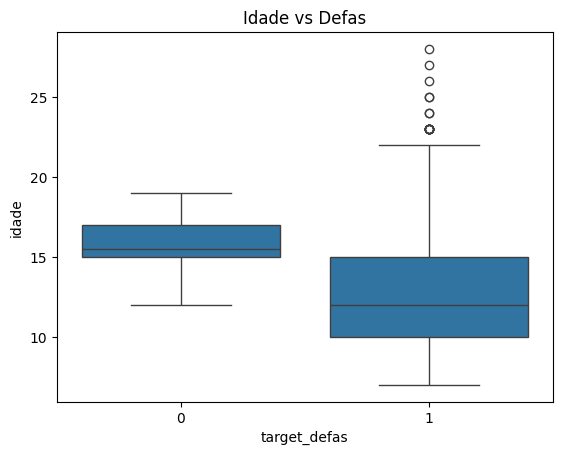

In [30]:
df_tratado["idade"] = df_tratado["ano_base"] - df_tratado["Ano nasc"]

plt.figure()
sns.boxplot(x="target_defas", y="idade", data=df_tratado)
plt.title("Idade vs Defas")
plt.show()


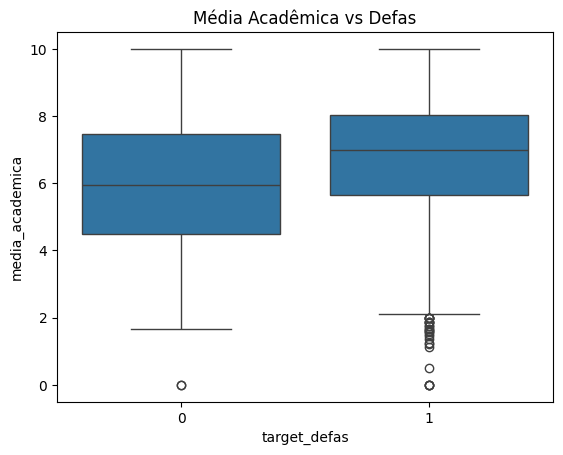

In [31]:
# Média acadêmica
cols_acad = ["Matem", "Portug", "Inglês", "IDA", "IAA"]

df_tratado["media_academica"] = df_tratado[cols_acad].mean(axis=1)

plt.figure()
sns.boxplot(x="target_defas", y="media_academica", data=df_tratado)
plt.title("Média Acadêmica vs Defas")
plt.show()


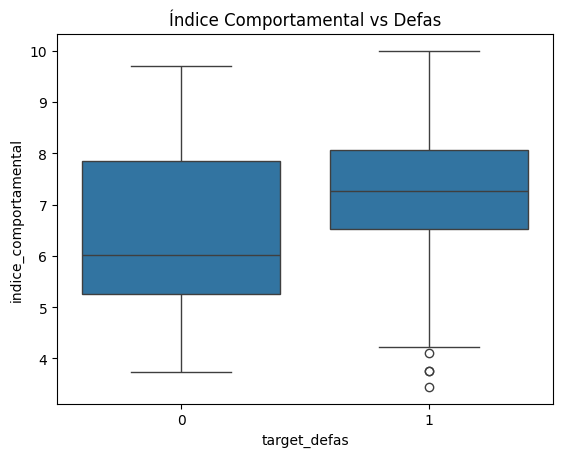

In [32]:
# Índice comportamental
cols_comp = ["IEG", "IPS", "IPV", "IAN"]

df_tratado["indice_comportamental"] = df_tratado[cols_comp].mean(axis=1)

plt.figure()
sns.boxplot(x="target_defas", y="indice_comportamental", data=df_tratado)
plt.title("Índice Comportamental vs Defas")
plt.show()


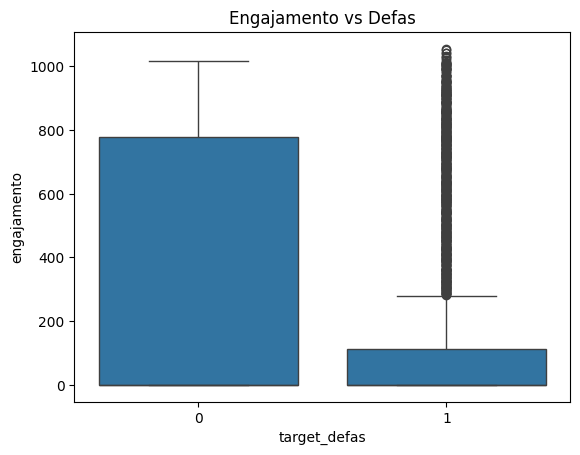

In [33]:
# Engajamento

cols_eng = ["Cg", "Cf", "Ct"]

df_tratado["engajamento"] = df_tratado[cols_eng].sum(axis=1)

plt.figure()
sns.boxplot(x="target_defas", y="engajamento", data=df_tratado)
plt.title("Engajamento vs Defas")
plt.show()


In [34]:
df_tratado["flag_destaque_ieg"] = (
    df_tratado["Destaque IEG"]
        .astype(str)
        .str.contains("Destaque", case=False, na=False)
        .astype(int)
)

pd.crosstab(
    df_tratado["flag_destaque_ieg"],
    df_tratado["target_defas"],
    normalize="index"
)

target_defas,0,1
flag_destaque_ieg,,
0,0.022014,0.977986
1,0.029463,0.970537


In [36]:
for c in cat_cols:
    df_tratado[c] = df_tratado[c].astype(str)

In [37]:
df_tratado.to_parquet("../data/processed/dados_tratados.parquet", index=False)